# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.Создайте датафреймы X и y из этих
 данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
from sklearn.datasets import load_boston

In [134]:
boston = load_boston()

In [135]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [140]:
from sklearn.manifold import TSNE

In [141]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [142]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


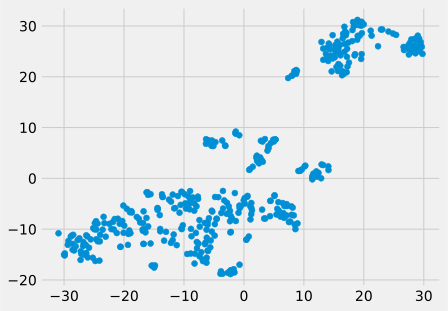

In [143]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [144]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

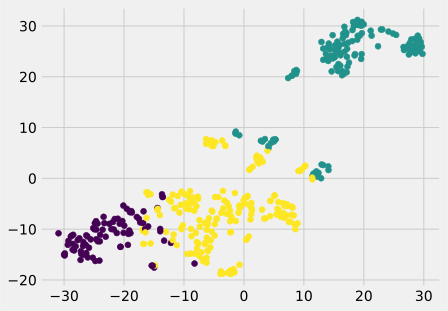

In [145]:
lab_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=lab_train)
plt.show()

In [146]:
print('Первый кластер [price]: ', y_train[lab_train == 0].mean())
print('Второй кластер [price]: ', y_train[lab_train == 1].mean())
print('Третий кластер [price]: ', y_train[lab_train == 2].mean())

Первый кластер [price]:  27.78837209302326
Второй кластер [price]:  16.165354330708663
Третий кластер [price]:  24.958115183246072


In [147]:
print('Первый кластер [CRIM]: ', X_train['CRIM'][lab_train == 0].mean())
print('Второй кластер [CRIM]: ', X_train['CRIM'][lab_train == 1].mean())
print('Третий кластер [CRIM]: ', X_train['CRIM'][lab_train == 2].mean())

Первый кластер [CRIM]:  0.07356558139534886
Второй кластер [CRIM]:  10.797028425196853
Третий кластер [CRIM]:  0.42166020942408367


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [150]:
lab_test = model.predict(X_test_scaled)

In [151]:
print('Первый кластер [price]: ', y_test[lab_test == 0].mean())
print('Второй кластер [price]: ', y_test[lab_test == 1].mean())
print('Третий кластер [price]: ', y_test[lab_test == 2].mean())

Первый кластер [price]:  31.35
Второй кластер [price]:  16.43714285714286
Третий кластер [price]:  21.860784313725492


In [152]:
print('Первый кластер: ', X_test['CRIM'][lab_test == 0].mean())
print('Второй кластер:', X_test['CRIM'][lab_test== 1].mean())
print('Третий кластер:', X_test['CRIM'][lab_test== 2].mean())

Первый кластер:  0.062060000000000004
Второй кластер: 10.165531142857143
Третий кластер: 0.26607882352941176
